**Import the required Libraries.**

In [ ]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading data**

In [2]:
#Reading data 
df=pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [58]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028,21.1452,19.402985
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332,76.3268,20.481928
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932,239.1828,8.108108
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,16.2800,81.818182
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480,170.2120,42.857143


In [5]:
df.shape

(9994, 13)

In [57]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Cost', 'Profit %'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Data cleaning**

In [8]:
#Data cleaning
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Data Visualizations**

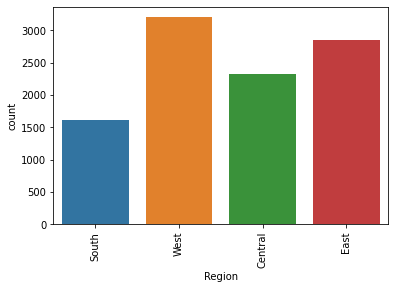

In [47]:
#Data Visualizations
sns.countplot(x="Region",data=df)
plt.xticks(rotation=90)
plt.show()

West is the highest participating region in the business than is the east.


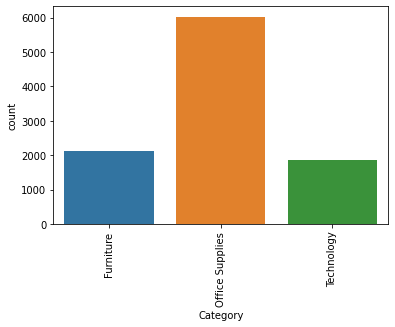

In [48]:
sns.countplot(x="Category",data=df)
plt.xticks(rotation=90)
plt.show()


The office supplies are the highest ordered.

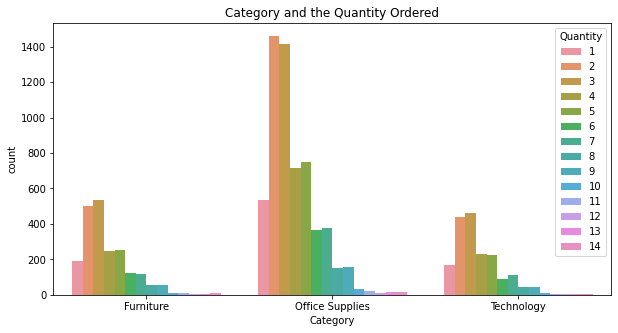

In [65]:
plt.figure(figsize=(10,5))
sns.countplot("Category",data=df,hue="Quantity")
plt.title("Category and the Quantity Ordered")
plt.show()

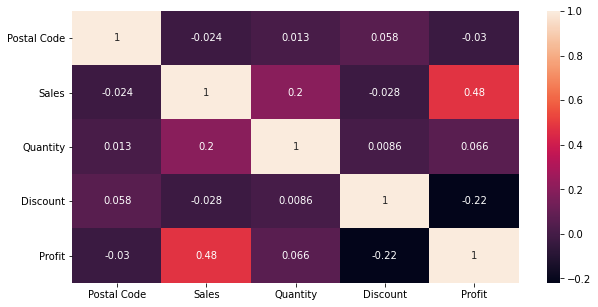

In [20]:
#heatmap to check the correlation of the dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [53]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [56]:
df['Profit %']=(df['Profit']/df['Cost'])*100
df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.9800,2,0.00,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.1000,2,0.00,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.8000,4,0.00,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.8800,6,0.00,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.9600,7,0.00,25.4800,25.4800,100.000000
8422,Standard Class,Consumer,United States,Lakewood,New Jersey,8701,East,Office Supplies,Fasteners,17.9000,5,0.00,8.7710,9.1290,96.078431
9336,Standard Class,Corporate,United States,San Francisco,California,94110,West,Office Supplies,Fasteners,17.9000,5,0.00,8.7710,9.1290,96.078431
888,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Paper,34.6800,6,0.00,16.9932,17.6868,96.078431
1117,Standard Class,Consumer,United States,Roswell,Georgia,30076,South,Office Supplies,Paper,279.9000,5,0.00,137.1510,142.7490,96.078431
1990,Standard Class,Consumer,United States,Springfield,Missouri,65807,Central,Office Supplies,Paper,17.3400,3,0.00,8.4966,8.8434,96.078431


From above we can see thet selling phones got 100percent profit.

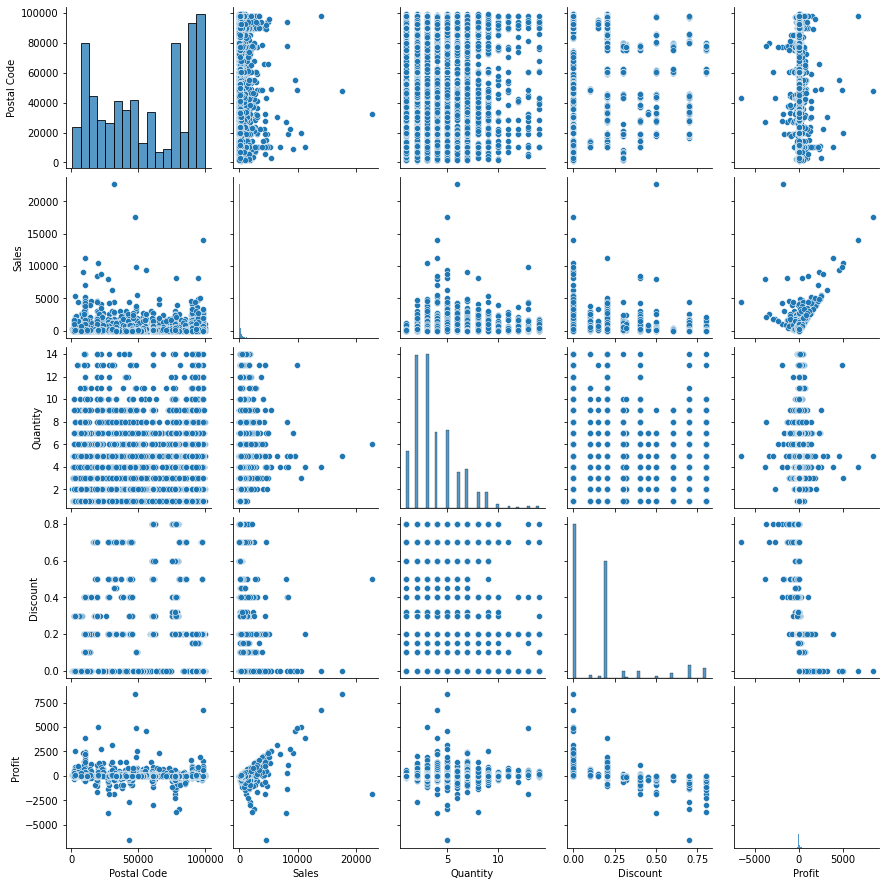

In [34]:
sns.pairplot(df)
plt.show()

#                          **THANK YOU..!!!**

---



---

